## Vehicle Resell price prediction (Data from cardekho)
* Dataset Link: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(font_scale=1.1)

In [2]:
data=pd.read_csv(r'vehicle data.csv')
data.head()

,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### **Understanding the data**

In [3]:
data.dtypes

Name              object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [4]:
print("We have data from year {} to {}.".format(data.Year.min(),data.Year.max()))
print("\nDifferent Fuel types are {}".format(data.Fuel_Type.unique()))
print("\nSeller types are {}".format(data.Seller_Type.unique()))
print("\nTransmission types are {}".format(data.Transmission.unique()))
print("\nOwner types are {}".format(data.Owner.unique()))

We have data from year 2003 to 2018.

Different Fuel types are ['Petrol' 'Diesel']

Seller types are ['Dealer' 'Individual']

Transmission types are ['Manual' 'Automatic']

Owner types are [0 1 3]


<AxesSubplot:>

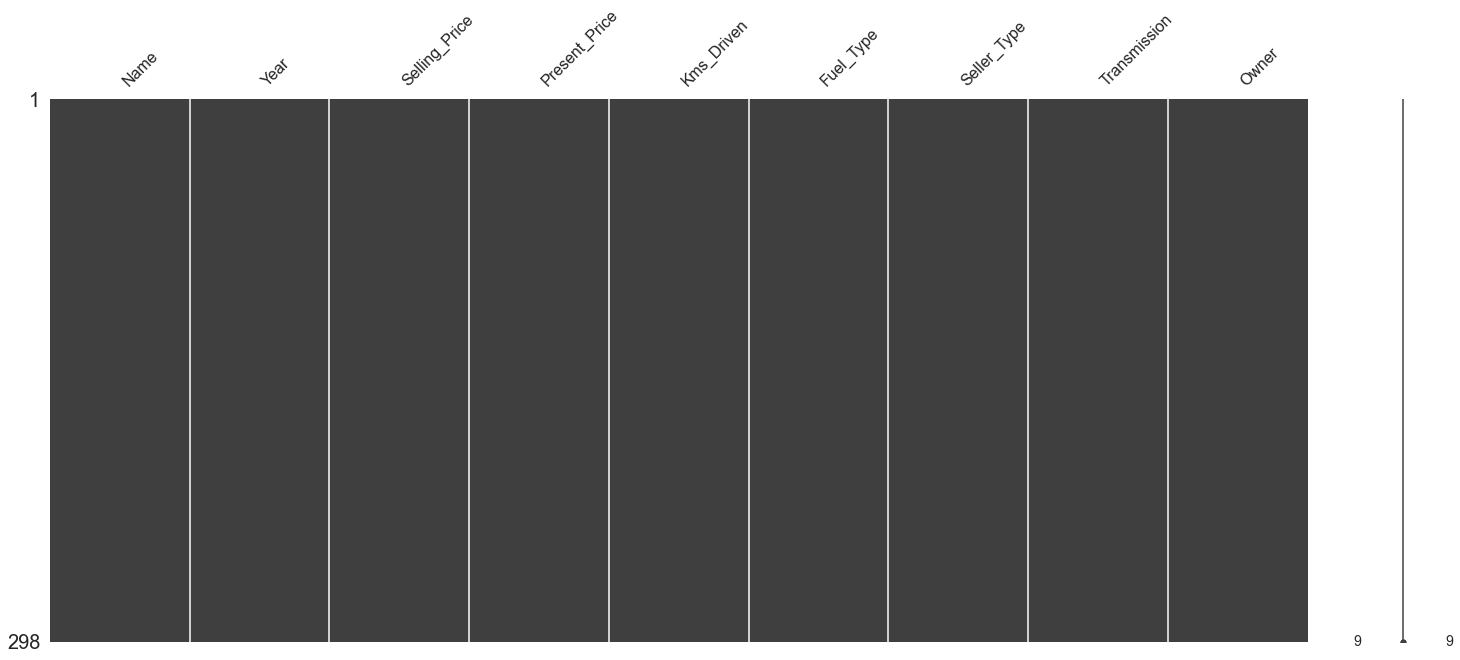

In [5]:
import missingno as mn
mn.matrix(data)

### **Exploratory Data Analysis(EDA)**

In [6]:
data.head()

,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


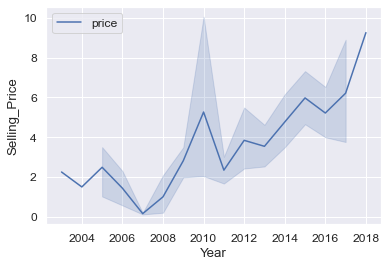

In [7]:
sns.lineplot(x='Year',y='Selling_Price',data=data,label='price')
plt.show()

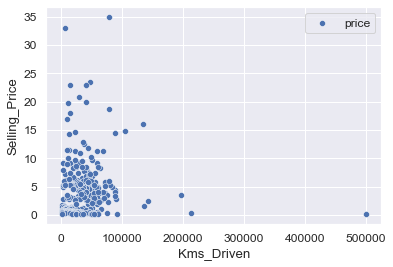

In [8]:
# plt.figure(figsize=(8,6))
sns.scatterplot(x='Kms_Driven',y='Selling_Price',data=data,label='price')
plt.show()

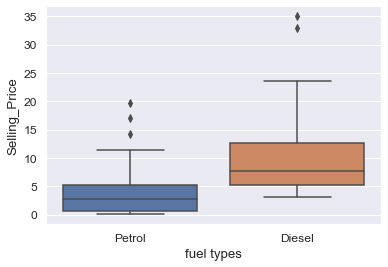

In [9]:
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=data)
plt.xlabel("fuel types")
plt.show()

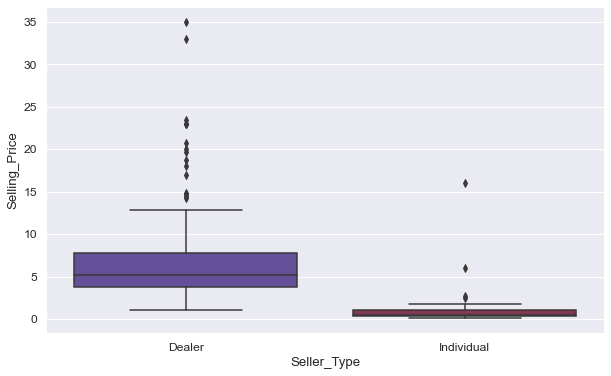

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Seller_Type',y='Selling_Price',data=data,palette='twilight')
plt.show()

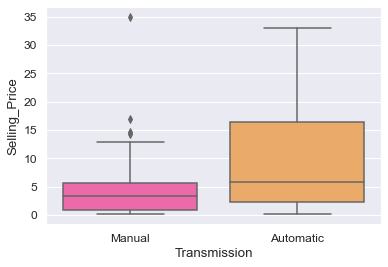

In [11]:
# plt.figure(figsize=(10,6)) https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
sns.boxplot(x='Transmission',y='Selling_Price',data=data,palette='spring')
plt.show()

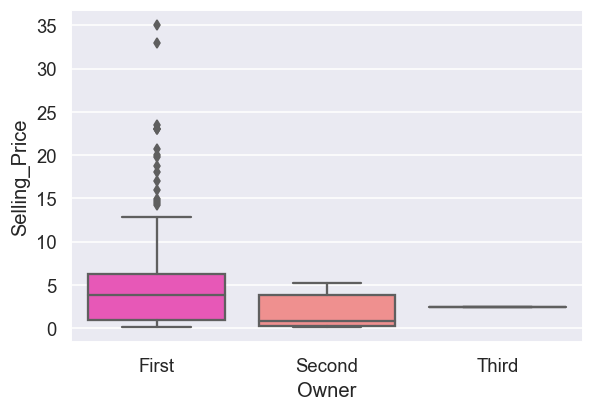

In [12]:
plt.figure(dpi=110)
Owner=[]
for i in data.Owner:
    if(i==0):
        m="First"
    elif(i==1):
        m="Second"
    else:
        m="Third"
    
    Owner.append(m)

sns.boxplot(x=Owner,y=data['Selling_Price'],palette='spring')
plt.xlabel('Owner')

plt.show()

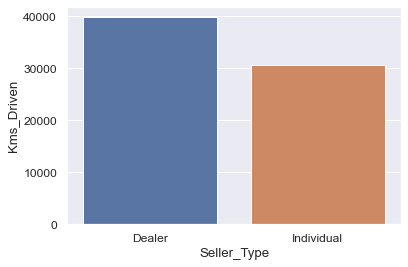

In [13]:
# plt.figure(figsize=(10,8))
sns.barplot(x='Seller_Type',y='Kms_Driven',data=data,ci = 0)
plt.show()

### **Data Preprocessing**

* Feature Generation

In [14]:
data.head()

,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
data['vehicle_age']=2020-data['Year']
data.drop('Year',axis=1,inplace=True)
data.head()

,Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


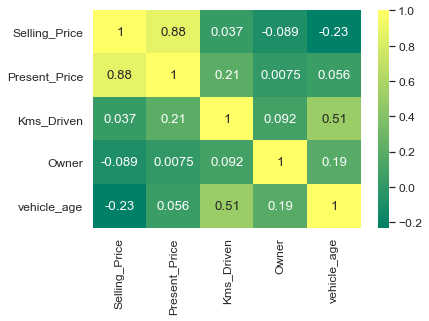

In [16]:
sns.heatmap(data.corr(),annot=True,cmap='summer')
plt.show()

<AxesSubplot:>

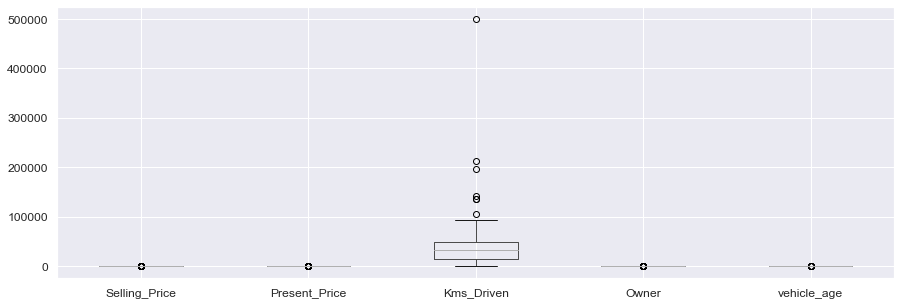

In [17]:
data.boxplot(figsize=(15,5))

<AxesSubplot:>

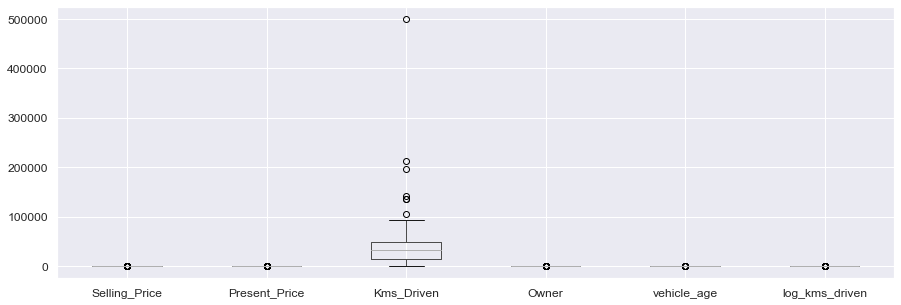

In [18]:
data['log_kms_driven']=np.log10(data['Kms_Driven'])
data.boxplot(figsize=(15,5))

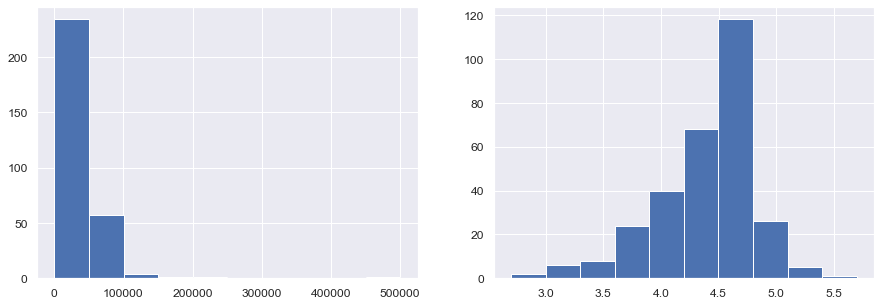

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(data['Kms_Driven'])

plt.subplot(1,2,2)
plt.hist(data['log_kms_driven'])
plt.show()

In [20]:
data.drop('Kms_Driven',axis=1,inplace=True)

* Handling categorical data

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
data.head()

,Name,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age,log_kms_driven
0,ritz,3.35,5.59,Petrol,Dealer,Manual,0,6,4.431364
1,sx4,4.75,9.54,Diesel,Dealer,Manual,0,7,4.633468
2,ciaz,7.25,9.85,Petrol,Dealer,Manual,0,3,3.838849
3,wagon r,2.85,4.15,Petrol,Dealer,Manual,0,9,3.716003
4,swift,4.60,6.87,Diesel,Dealer,Manual,0,6,4.627878


In [23]:
X=data.iloc[:,2:]
y=data.iloc[:,1]

In [24]:
X.head()

,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age,log_kms_driven
0,5.59,Petrol,Dealer,Manual,0,6,4.431364
1,9.54,Diesel,Dealer,Manual,0,7,4.633468
2,9.85,Petrol,Dealer,Manual,0,3,3.838849
3,4.15,Petrol,Dealer,Manual,0,9,3.716003
4,6.87,Diesel,Dealer,Manual,0,6,4.627878


In [25]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X=ct.fit_transform(X)
X=X[:,1:]

In [26]:
X

array([[1.0, 5.59, 'Dealer', ..., 0, 6, 4.431363764158987],
       [0.0, 9.54, 'Dealer', ..., 0, 7, 4.633468455579586],
       [1.0, 9.85, 'Dealer', ..., 0, 3, 3.838849090737255],
       ...,
       [1.0, 11.0, 'Dealer', ..., 0, 11, 4.944156829082311],
       [0.0, 12.5, 'Dealer', ..., 0, 3, 3.9542425094393248],
       [1.0, 5.9, 'Dealer', ..., 0, 4, 3.737510690673476]], dtype=object)

In [27]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder="passthrough")
X=ct.fit_transform(X)
X=X[:,1:]

In [28]:
X

array([[0.0, 1.0, 5.59, ..., 0, 6, 4.431363764158987],
       [0.0, 0.0, 9.54, ..., 0, 7, 4.633468455579586],
       [0.0, 1.0, 9.85, ..., 0, 3, 3.838849090737255],
       ...,
       [0.0, 1.0, 11.0, ..., 0, 11, 4.944156829082311],
       [0.0, 0.0, 12.5, ..., 0, 3, 3.9542425094393248],
       [0.0, 1.0, 5.9, ..., 0, 4, 3.737510690673476]], dtype=object)

In [29]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder="passthrough")
X=ct.fit_transform(X)
X=X[:,1:]

In [30]:
X

array([[1.0, 0.0, 1.0, ..., 0, 6, 4.431363764158987],
       [1.0, 0.0, 0.0, ..., 0, 7, 4.633468455579586],
       [1.0, 0.0, 1.0, ..., 0, 3, 3.838849090737255],
       ...,
       [1.0, 0.0, 1.0, ..., 0, 11, 4.944156829082311],
       [1.0, 0.0, 0.0, ..., 0, 3, 3.9542425094393248],
       [1.0, 0.0, 1.0, ..., 0, 4, 3.737510690673476]], dtype=object)

### **Splitting Dataset into training and testing dataset**

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### **Multiple Linear Regression Model**

In [32]:
from sklearn.linear_model import LinearRegression
Lin_reg=LinearRegression()
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [33]:
print("Model trainig r2-score: ",Lin_reg.score(X_train,y_train))

Model trainig r2-score:  0.8843679869028627


In [34]:
print("Model testing r2-score: ",Lin_reg.score(X_test,y_test))

Model testing r2-score:  0.869535785312902


### **Random Forest Regression**

In [35]:
from sklearn.ensemble import RandomForestRegressor
Random_reg=RandomForestRegressor(random_state=0,n_estimators=30)
Random_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [36]:
Random_reg.score(X_train,y_train)

0.9881980674293651

In [37]:
Random_reg.score(X_test,y_test)

0.9678193443072753

### **Save Model**

In [38]:
import pickle
filename=r'vehicle_resell_price_pred.pkl'
pickle.dump(Random_reg,open(filename,'wb'))